# Introduction

## Using this notebook

This notebook helps you to analyze datasets and to find interesting and meaningful patterns in the data. If you are only interested in looking at an automated report outlining the most important features of your dataset, you can upload your datafile via the *dataset* variable and run the notebook. Afterwards, you can export the report as HTML and read it in a webbrowser.

If you are interested in a more interactive analysis of your data, you can also adapt the parameters of the notebook to suit your needs. Each section conatins several values which can be adapted to your needs. These values are described in the code comments.

Finally, if you want to go beyond an automated report and answer your own questions, you can look at the final section of the notebook and use the code examples there to generate your own figures and analysis from the data model.

### Reading this report in a webbrowser

This report uses several statistical methods and specific phrases and concepts from the domains of statistics and machine learning. Whenever such methods are used, a small "Explanation" sign at the side of the report marks a short explanation of the methods and phrases. Clicking it will reveal the explanation.

You can toggle the global visibility of these explanations with a button at the top left corner of the report. The code can also be toggled with a button.

All graphs are interactive and will display additional content on hover. You can get the exact values of the functions by selecting the assoziated areas in the graph. You can also move the plots around and zoom into interesting parts.

### Aknowledgments

This notebook is build on the MSPN implementation by Molina et.al. during the course of a bachelor thesis under the supervision of Alejandro Molina and Kristian Kersting at TU Darmstadt. The goal of this framework is to sum product networks for hybrid domains and to highlight important aspects and interesting features of a given dataset.

In [67]:
import pickle
import pandas as pd
import numpy as np

#from tfspn.SPN import SPN
from pprint import PrettyPrinter
from IPython.display import Image
from IPython.display import display, Markdown
from importlib import reload

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

from deep_notebooks.text_util import printmd
import deep_notebooks.ba_functions as f
import deep_notebooks.dn_plot as p
import deep_notebooks.dn_text_generation as descr
import deep_notebooks.data_util as util

from spn.algorithms.LearningWrappers import learn_piecewise_from_data

init_notebook_mode(connected=True)
# pp = PrettyPrinter()

In [68]:
# path to the dataset you want to use for training
dataset = 'deep_notebooks/example_data/iris'

# the minimum number of datapoints that are included in a child of a 
# sum node
min_instances = 25

# the parameter which governs how strict the independence test will be
# 1 results in all features being evaluated as independent, 0 will 
# result in no features being acccepted as truly independent
independence_threshold = 0.3


spn, dictionary = learn_piecewise_from_data(
    data_file=dataset, 
    header=0, 
    min_instances=min_instances, 
    independence_threshold=independence_threshold, 
    histogram=True)
df = pd.read_csv(dataset)
context = dictionary['context']
categoricals = context.get_categoricals()

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning:

X scores are null at iteration 0

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning:

invalid value encountered in true_divide

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning:

Maximum number of iterations reached

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning:

X scores are null at iteration 0

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning:

invalid value encountered in true_divide



In [69]:
# path to the model pickle file
model_path = "deep_notebooks/models/test.pickle"

# UNCOMMENT THE FOLLOWING LINES TO LOAD A MODEL
#spn = SPN.from_pickle(model_path)
#dictionary = pickle.load(model_path + "_d")

#df = pd.read_csv(data_path)

In [70]:
reload(descr)
descr.introduction(spn)

from spn.algorithms.Statistics import get_structure_stats
from spn.structure.Base import bfs

# Exploring the SumNode_0 dataset

<figure align="right" style="padding: 1em; float:right; width: 300px">
	<img alt="the logo of TU Darmstadt"
		src="deep_notebooks/images/tu_logo.gif">
	<figcaption><i>Report framework created @ TU Darmstadt</i></figcaption>
        </figure>
This report describes the dataset SumNode_0 and contains general statistical
information and an analysis on the influence different features and subgroups
of the data have on each other. The first part of the report contains general
statistical information about the dataset and an analysis of the variables
and probability distributions.<br/>
The second part focusses on a subgroup analysis of the data. Different
clusters identified by the network are analyzed and compared to give an
insight into the structure of the data. Finally the influence different
variables have on the predictive capabilities of the model are analyzes.<br/>
The whole report is generated by fitting a sum product network to the
data and extracting all information from this model.

## General statistical evaluation

In [71]:
reload(descr)
descr.data_description(context, df)

The dataset contains 150 entries and is comprised of 5 features, which are "sepal length", "sepal width", "petal length", "petal width", "scientific name".

"sepal length", "sepal width", "petal length", "petal width" are continuous features, while "scientific name" are categorical features. Continuous and discrete features were approximated with piecewise            linear density functions, while categorical features are represented by             histogramms of their probability.

Below, the means and standard deviations of each feature are shown. Categorical 
features do not have a mean and a standard deviation, since they contain no ordering. Instead, 
the network returns NaN.

In [72]:
descr.means_table(spn, context)

In the following section, the marginal distributions for each feature is shown. This 
is the distribution of each feature without knowing anything about the other values.

In [73]:
reload(descr)
descr.features_shown = 'all'

descr.show_feature_marginals(spn, dictionary)

### Correlations

To get a sense of how the features relate to one another, the correlation between 
them is analyzed in the next section. The correlation denotes how strongly two features are 
linked. A high correlation (close to 1 or -1) means that two features are very closely related, 
while a correlation close to 0 means that there is no linear interdependency between the features.

The correlation is reported in a colored matrix, where blue denotes a negative and red denotes 
a positive correlation.

In [74]:
descr.correlation_threshold = 0.4

corr = descr.correlation_description(spn, dictionary)

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:35: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:33: RuntimeWarning:

invalid value encountered in double_scalars

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:36: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:110: RuntimeWarning:

invalid value encountered in greater

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:111: RuntimeWarning:

invalid value encountered in less



"petal length" and "sepal length" influence each other strongly. As one increases, the other increases. The features "petal width" and "sepal length" have a strong positive linear relation. The model shows a strong positive linear interdependency for the features "petal width" and "petal length".

All other features do not have more then a very weak correlation.

The conditional distributions are the probabilities of the features, given 
a certain instance of a class. The joint probability functions of correlated variables 
are shown below to allow a more in-depth look into the dependency.

In [75]:
reload(descr)

descr.correlation_threshold = 0
descr.feature_combinations = 'all'
descr.show_conditional = True

descr.categorical_correlations(spn, dictionary)

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:35: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:33: RuntimeWarning:

invalid value encountered in double_scalars

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:36: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:110: RuntimeWarning:

invalid value encountered in greater

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:111: RuntimeWarning:

invalid value encountered in less



The model shows a weak  dependency for the features "sepal width" and "sepal length".

"petal length" and "sepal length" have a strong  dependency.

There is a moderate  relationship between "petal length" and "sepal width".

The model shows a strong  relationship for "petal width" and "sepal length".

There is a moderate  interdependency for "petal width" and "sepal width".

The features "petal width" and "petal length" have a strong  interdependency.

---

## Cluster evaluation

To give an impression of the data representation as a whole, the complete network graph is 
shown below. The model is a tree, with a sum node at its center. The root of the tree is shown 
in white, while the sum and product nodes are green and blue respectively. Finally, all 
leaves are represented by red nodes.

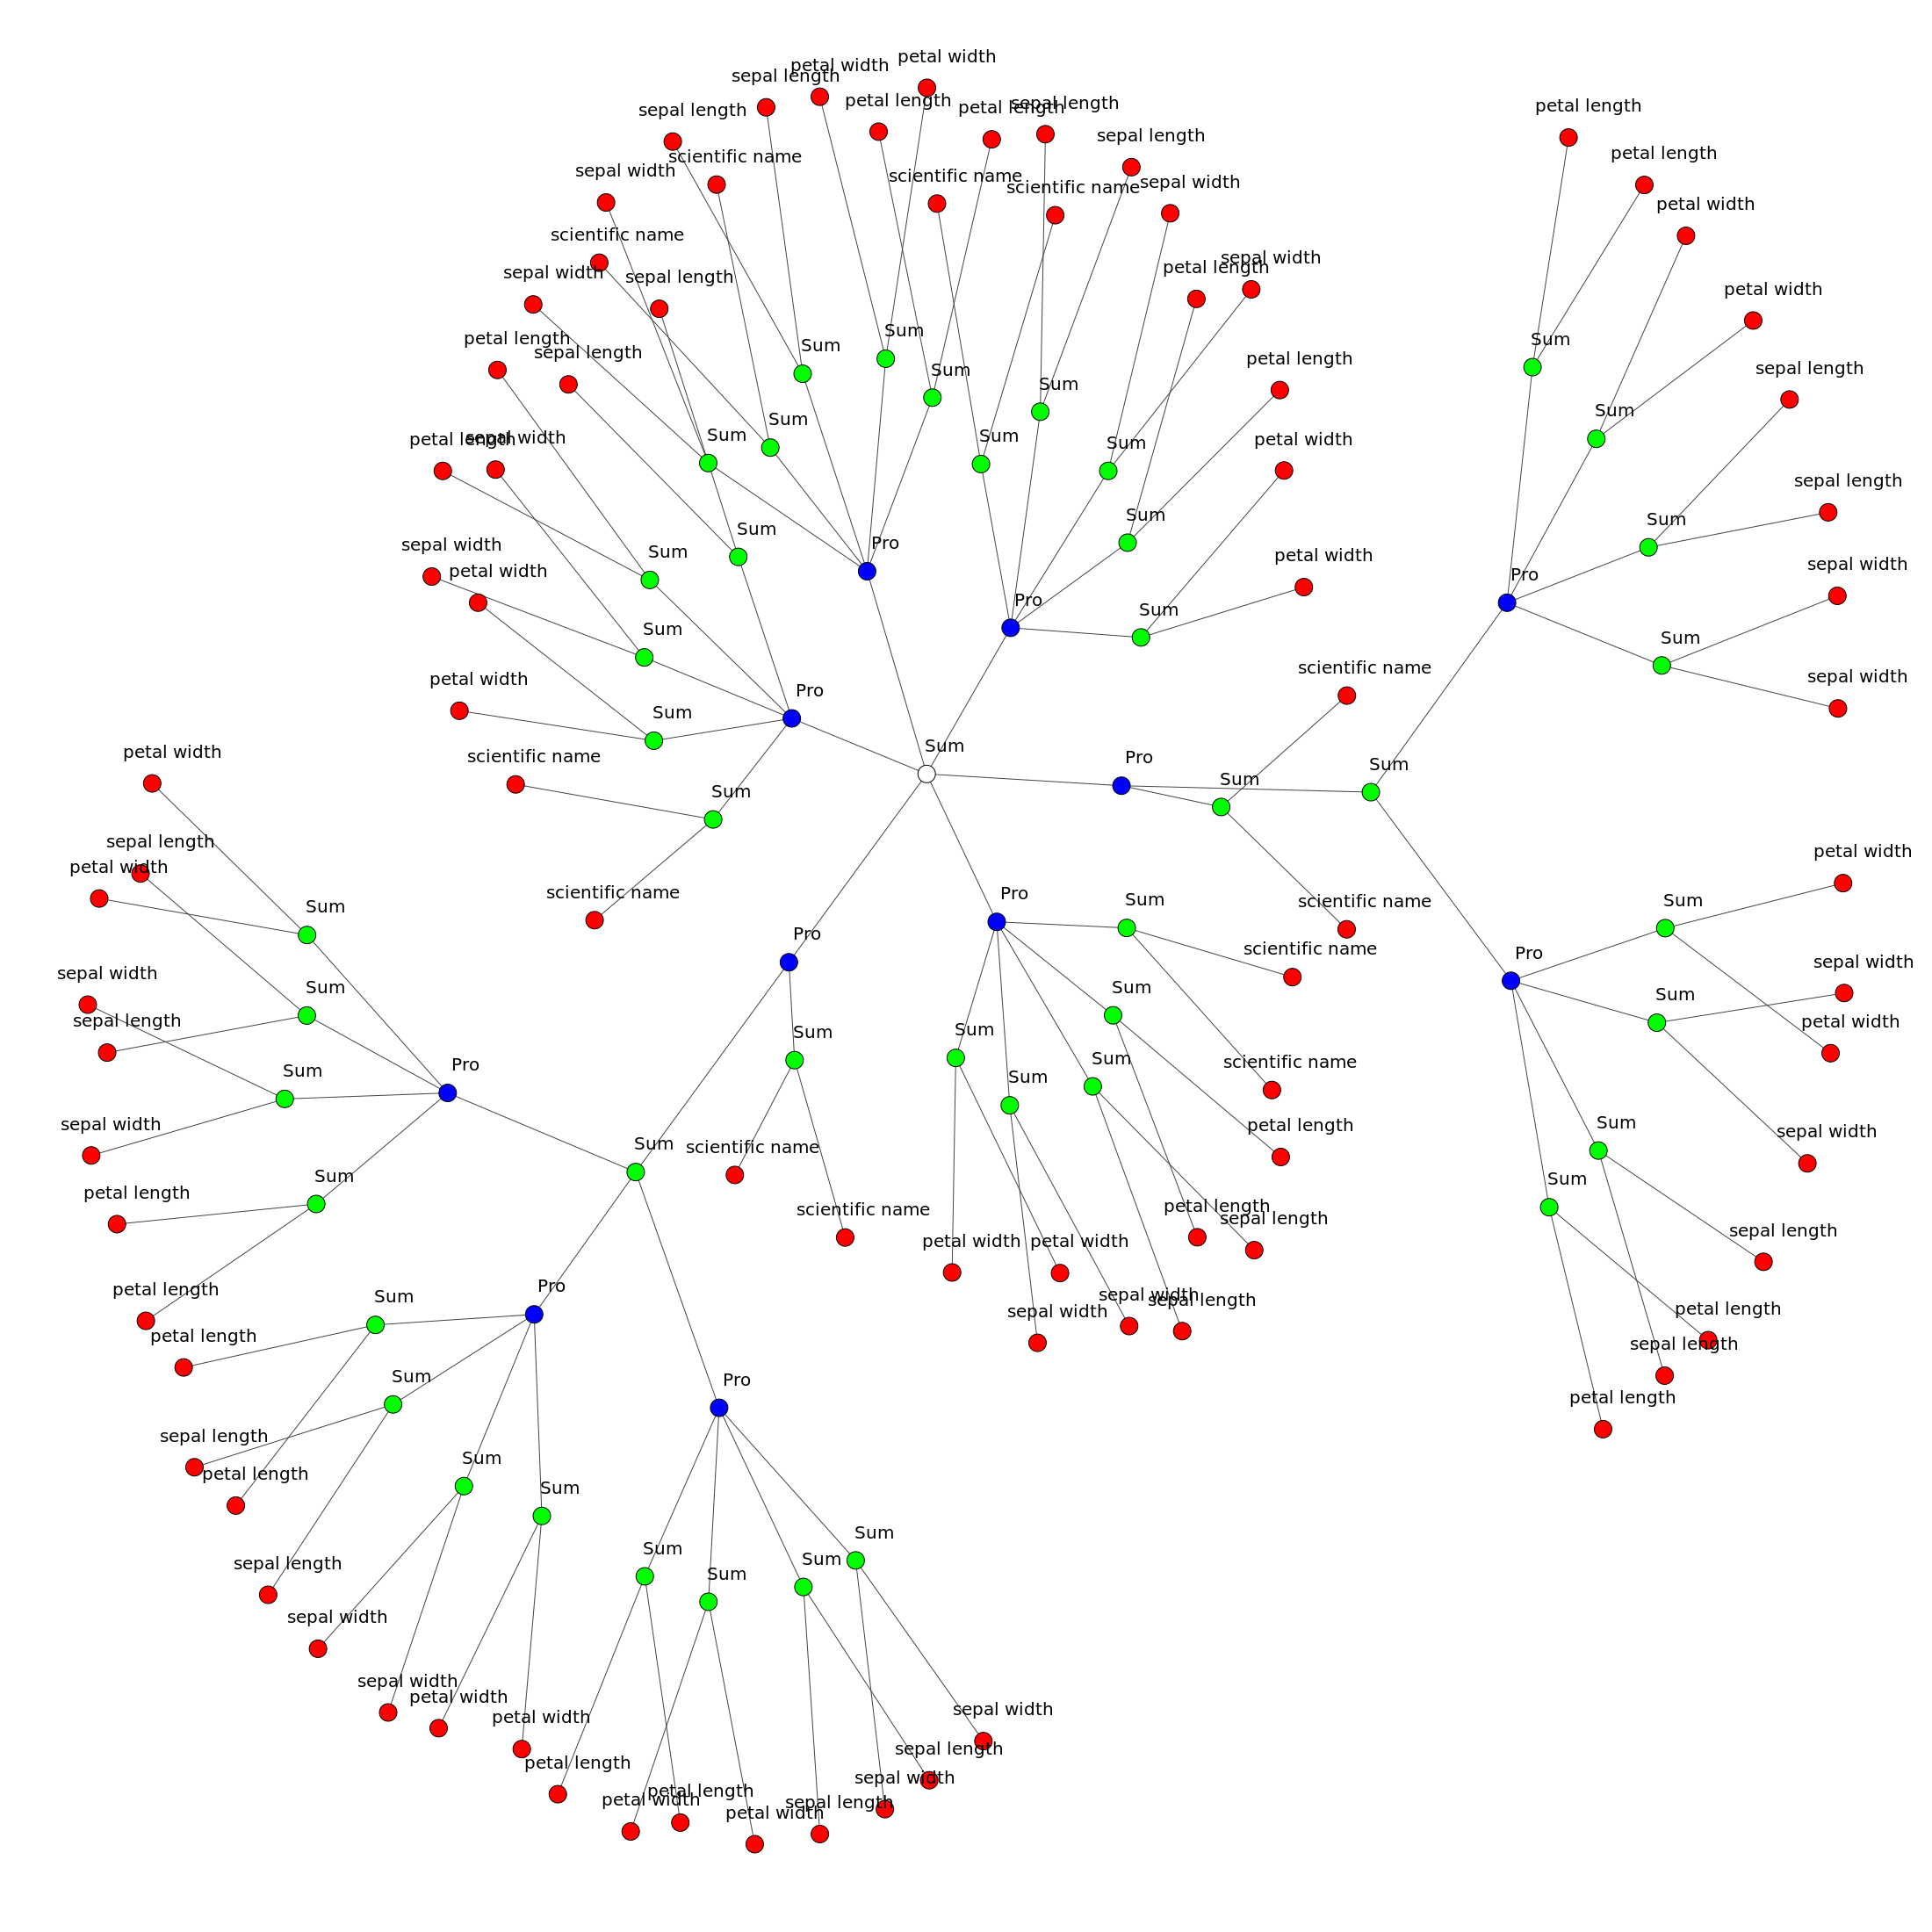

In [76]:
p.plot_graph(spn=spn, fname='deep_notebooks/images/graph.png', context=context)
display(Image(filename='deep_notebooks/images/graph.png', width=400))

The data model provides a clustering of the data points into groups in which features are 
independent. The groups extracted from the data are outlined below together with a short 
description of the data they cover. Each branch in the model represents one cluster found 
in the data model.

### Description of all clusters

The SPN contains 6 clusters.


These are:

- a deep Product Node, representing 32.67% of the data.
  - The node has 2 children and 43 descendants,                    resulting in a remaining depth of 4.


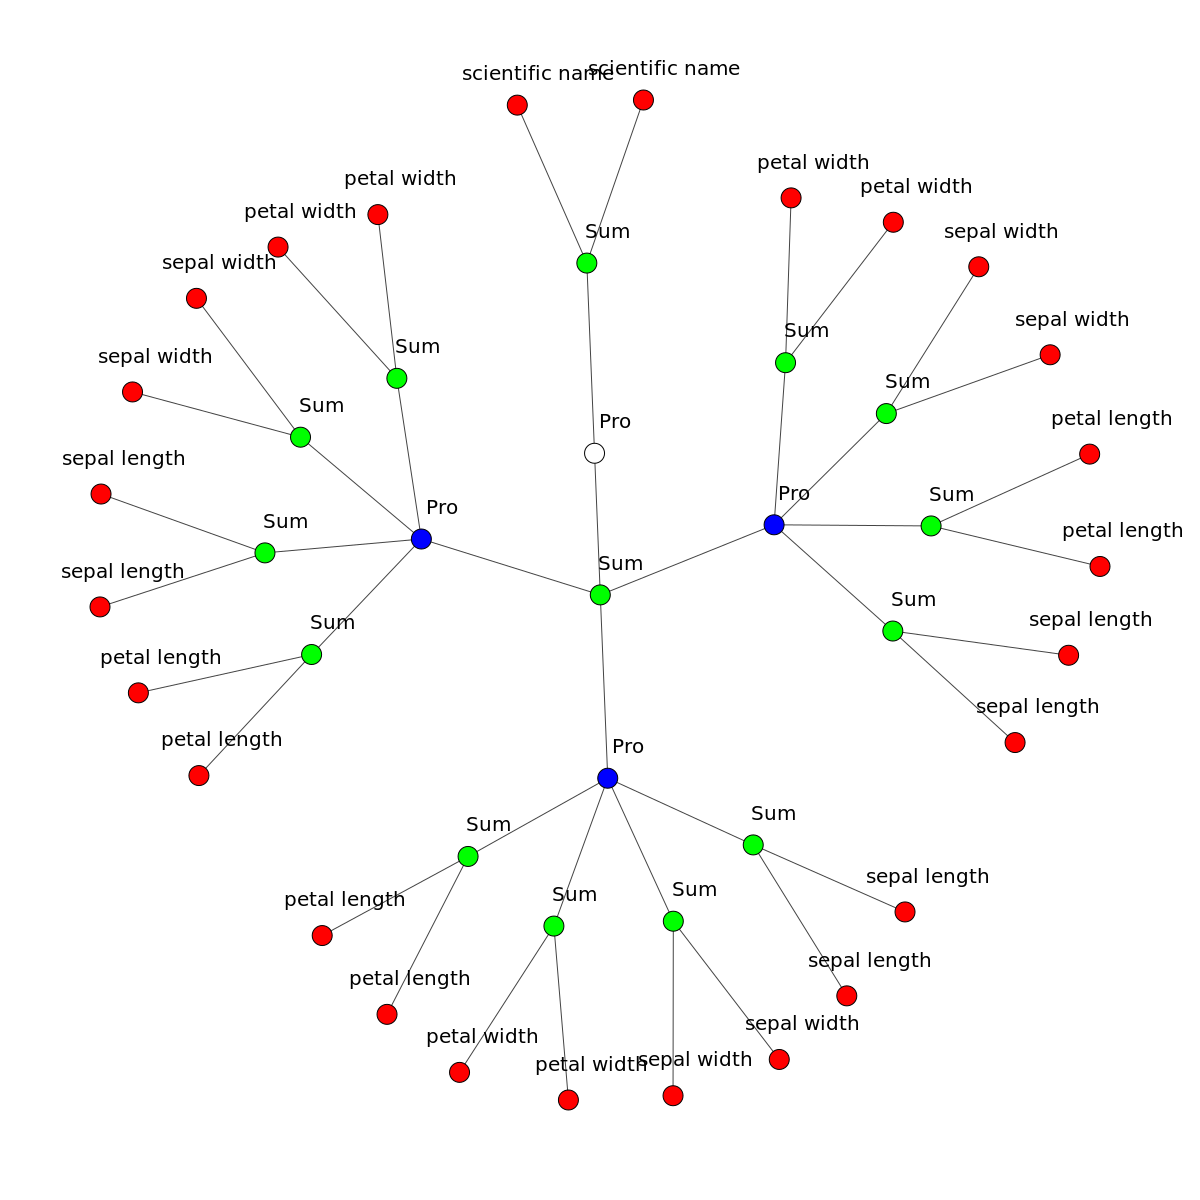

- a deep Product Node, representing 18.0% of the data.
  - The node has 2 children and 30 descendants,                    resulting in a remaining depth of 4.


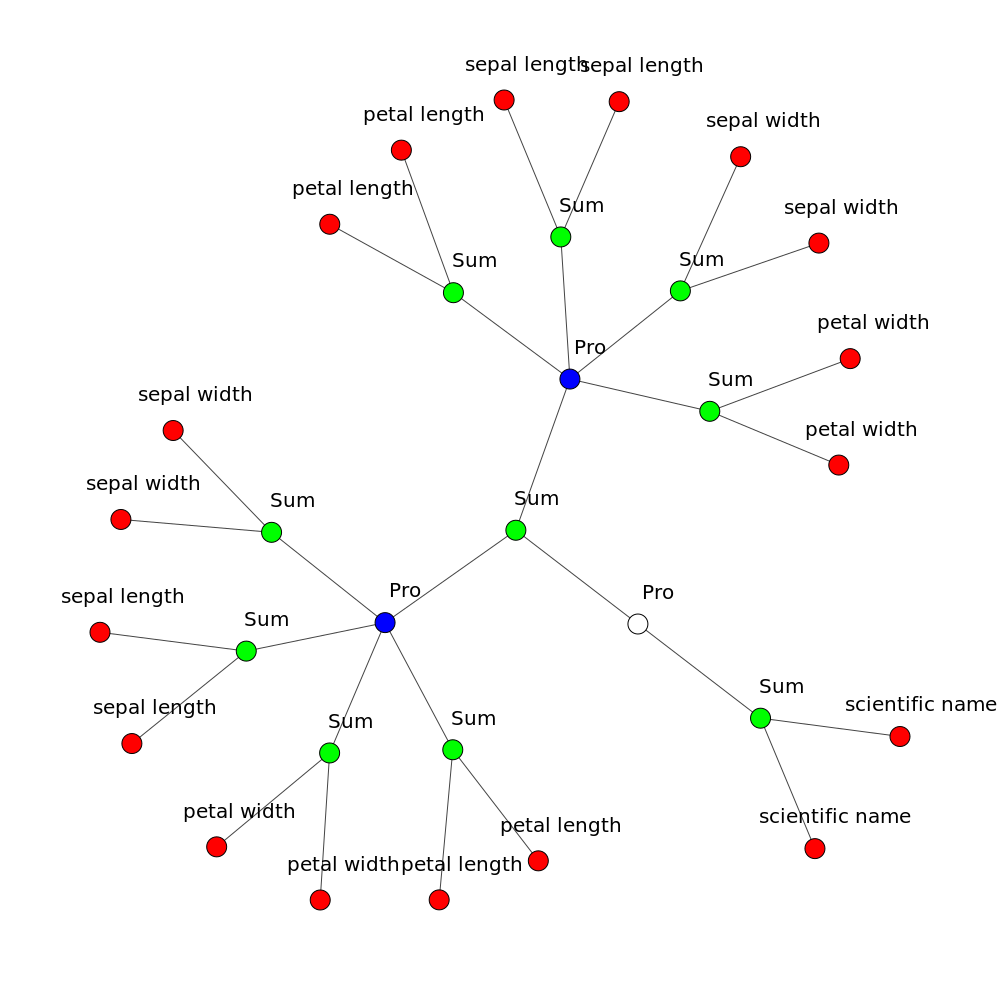

- a deep Product Node, representing 16.0% of the data.
  - The node has 5 children and 15 descendants,                    resulting in a remaining depth of 2.


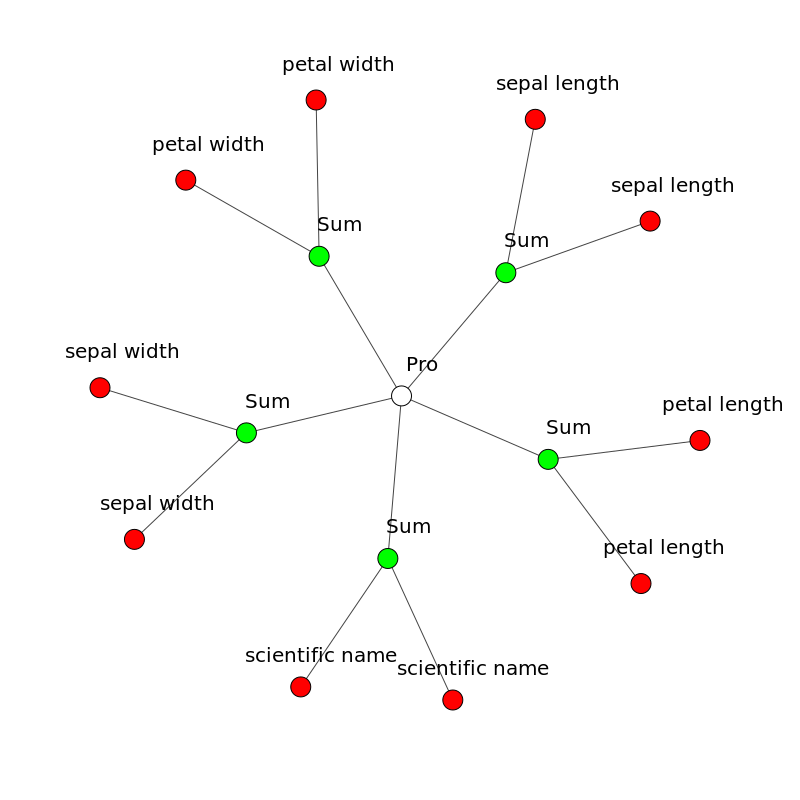

- a deep Product Node, representing 15.33% of the data.
  - The node has 5 children and 15 descendants,                    resulting in a remaining depth of 2.


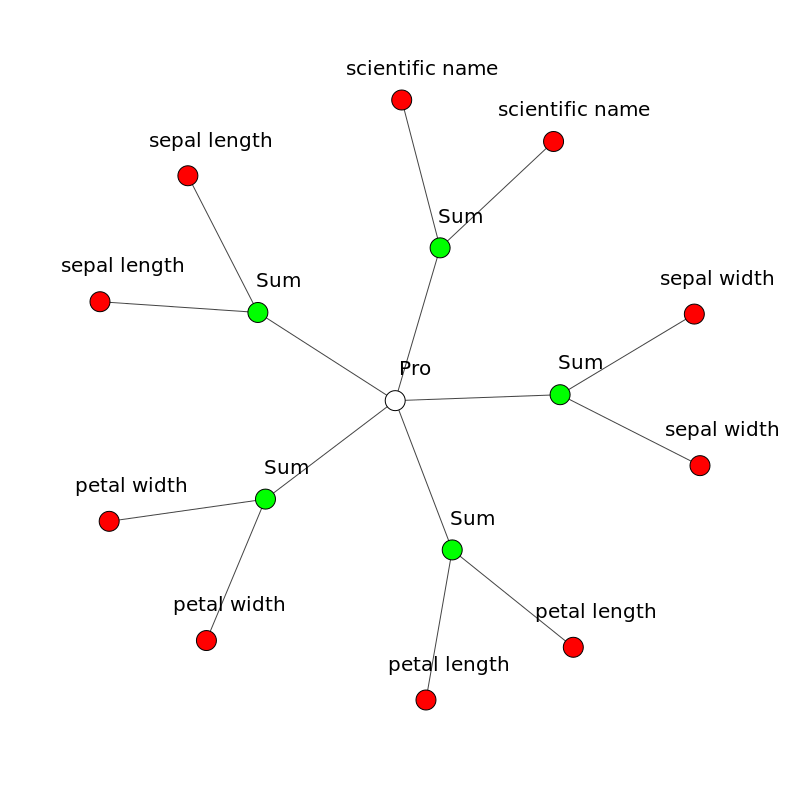

- a deep Product Node, representing 14.0% of the data.
  - The node has 5 children and 15 descendants,                    resulting in a remaining depth of 2.


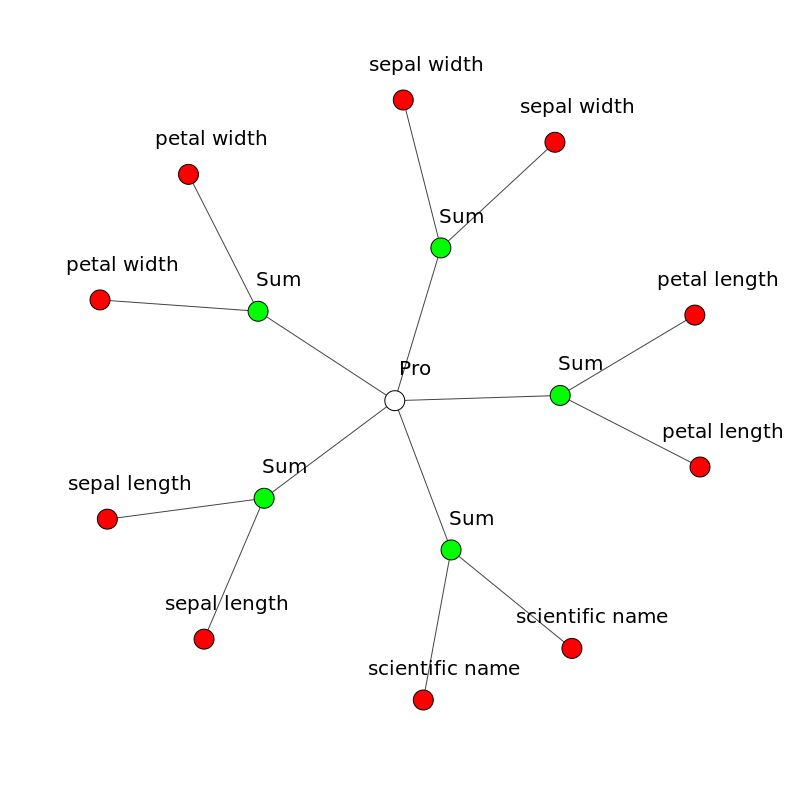

- a deep Product Node, representing 4.0% of the data.
  - The node has 5 children and 15 descendants,                    resulting in a remaining depth of 2.


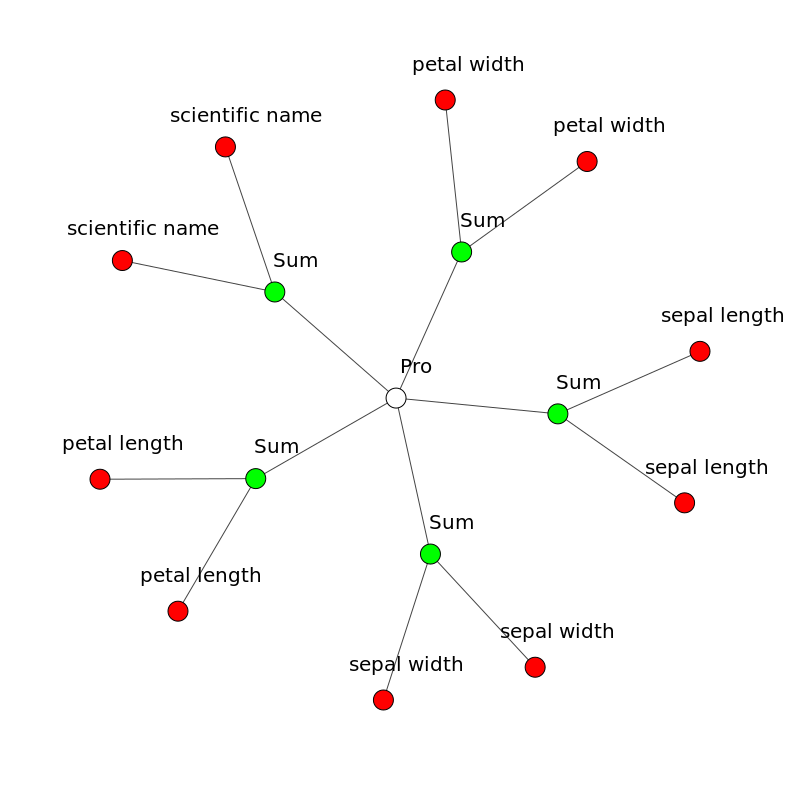

The node representatives are the most likely data points for each node.            They are archetypal for what the node represents and what subgroup of            the data it encapsulates.

In [77]:
# possible values: 'all', 'big', int (leading to a random sample), list of nodes to be displayed
nodes = f.get_sorted_nodes(spn)

reload(descr)
descr.nodes = 'all'
descr.show_node_graphs = True

descr.node_introduction(spn, nodes, context)

As stated above, each cluster captures a subgroup of the data. To show what variables are 
captured by which cluster, the means and variances for each feature and subgroup are plotted below. 
This highlights where the node has its focus.

In [78]:
descr.features_shown = 'all'
descr.mean_threshold = 0.1
descr.variance_threshold = 0.1
descr.separation_threshold = 0.1

separations = descr.show_node_separation(spn, nodes, context)

The feature "sepal length" is strongly separated by the clustering. The variances of the nodes 0, 2 are significantly larger then the average node. The means of the nodes 0, 3 are significantly larger then the average node. The means of the nodes 1, 2, 4, 5 are significantly smaller then the average node.

The feature "sepal width" is moderately separated by the clustering. The variances of the nodes 0, 1, 5 are significantly larger then the average node. The means of the nodes 1, 2 are significantly larger then the average node. The means of the nodes 0, 3, 4, 5 are significantly smaller then the average node.

The feature "petal length" is strongly separated by the clustering. The variances of the nodes 0, 1, 2 are significantly larger then the average node. The means of the nodes 0, 3, 4 are significantly larger then the average node. The means of the nodes 1, 2, 5 are significantly smaller then the average node.

The feature "petal width" is strongly separated by the clustering. The variances of the nodes 0, 1, 2 are significantly larger then the average node. The means of the nodes 0, 3, 4 are significantly larger then the average node. The means of the nodes 1, 2, 5 are significantly smaller then the average node.

An analysis of the 
distribution of categorical variables is given below. If a cluster or a group of clusters 
capture a large fraction of the total likelihood of a categorical instance, they can be 
interpreted to represent this instance and the associated distribution.

In [79]:
reload(descr)

descr.categoricals = 'all'

descr.node_categorical_description(spn, dictionary)

#### Distribution of scientific name

90.57% of "['Iris-setosa']" is captured by the nodes 4, 5. The probability of                        "['Iris-setosa']" for this group of nodes is 93.24%

88.76% of "['Iris-versicolor']" is captured by the nodes 1, 2, 3. The probability of                        "['Iris-versicolor']" for this group of nodes is 92.92%

98.0% of "['Iris-virginica']" is captured by the nodes 0. The probability of                        "['Iris-virginica']" for this group of nodes is 91.3%

### Correlations by cluster

Finally, since each node captures different interaction between the features, it is 
interesting to look at the correlations again, this time for the seperate nodes. Shallow 
nodes are omitted, because the correlation of independent variables is always 0.

In [80]:
reload(descr)

descr.correlation_threshold = 0.1
descr.nodes = 'all'

descr.node_correlation(spn, dictionary)

### Correlations for node 0

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:35: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:110: RuntimeWarning:

invalid value encountered in greater

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/stats/Correlations.py:111: RuntimeWarning:

invalid value encountered in less



"sepal width" and "sepal length" have a weak positive linear relation. There is a moderate positive linear interdependency for the features "petal length" and "sepal length". "petal length" and "sepal width" influence each other weakly. As one increases, the other increases. "petal width" and "sepal length" influence each other weakly, and "petal width" and "sepal width" influence each other weakly.

All other features do not have more then a very weak correlation.

### Correlations for node 1

No features show more then a very weak correlation.

### Correlations for node 2

No features show more then a very weak correlation.

### Correlations for node 3

No features show more then a very weak correlation.

### Correlations for node 4

"sepal width" and "sepal length" influence each other weakly. As one increases, the other increases.

All other features do not have more then a very weak correlation.

### Correlations for node 5

No features show more then a very weak correlation.

---
## Predictive data analysis

In [81]:
numerical_data, categorical_data = util.get_categorical_data(spn, df, dictionary)

After the cluster description, the data model is used to predict data points. To evaluate 
the performance of the model, the misclassification rate is shown below.

The classified data points are used to analyze more advanced patterns within the data, by looking
first at the misclassified points, and then at the classification results in total.

In [82]:
descr.classify = 'all'

misclassified, data_dict = descr.classification(spn, numerical_data, dictionary)

For feature "scientific name" the SPN misclassifies 6 instances, resulting in a precision of 96.0%.

Below, the misclassified examples are explained using the clusters they are most assoiciated with.
For each instance, those clusters which form 90 % of the prediction are reported together eith the
representatives of these clusters.

In [83]:
# IMPORTANT: Only set use_shapley to true if you have a really powerful machine
reload(descr)
reload(p)

descr.use_shapley = False
descr.shapley_sample_size = 1
descr.misclassified_explanations = 1

descr.describe_misclassified(spn, dictionary, misclassified, data_dict, numerical_data)

Instance 138 was predicted as "['Iris-versicolor']", even though it is "['Iris-virginica']", because it was most similar to the following clusters: 0, 4, 5, 1, 2

### Information gain through features

The following graphs highlight the relative importance of different features for a 
classification. It can show how different classes are predicted. For continuous and
discrete features, a high positvie or negative importance shows that changing this features
value positive or negative increases the predictions certainty.

For categorical values, positive and negative values highlight whether changing or keeping
this categorical value increases or decreasies the predictive certainty.

In [97]:
reload(descr)
reload(p)

descr.explanation_vector_threshold = 0
descr.explanation_vector_classes = None
descr.explanation_vectors_show = 'all'

expl_vectors = descr.explanation_vector_description(spn, dictionary, data_dict, categoricals)

#### Class "scientific name": "['Iris-setosa']"

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:35: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:33: RuntimeWarning:

invalid value encountered in double_scalars

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/spn/algorithms/Condition.py:36: RuntimeWarning:

divide by zero encountered in log

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning:

invalid value encountered in greater_equal

/home/iliricon/.virtualenvs/SimpleSPN/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning:

invalid value encountered in less_equal

/home/iliricon/Documents/Studium/ProjectsKersting/SimpleSPN/src/deep_notebooks/explanation_vector_grammar.py:246: RuntimeWarning:

invalid value encountered in true_divide



##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal length"



The feature "sepal length" is a very strong negative predictor for the instance                       "['Iris-setosa']" of class "scientific name".


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal width"



The feature "sepal width" is a very strong negative predictor for the instance                       "['Iris-setosa']" of class "scientific name".


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal length"



The feature "petal length" is a very strong negative predictor for the instance                       "['Iris-setosa']" of class "scientific name".


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal width"



The feature "petal width" is a very strong negative predictor for the instance                       "['Iris-setosa']" of class "scientific name".


#### Class "scientific name": "['Iris-versicolor']"

[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3.3 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal length"



The feature "sepal length" is a very strong negative predictor for the instance                       "['Iris-versicolor']" of class "scientific name".


[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3.3 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal width"



The feature "sepal width" is a very strong negative predictor for the instance                       "['Iris-versicolor']" of class "scientific name".


[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3.3 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal length"



The feature "petal length" is a very strong negative predictor for the instance                       "['Iris-versicolor']" of class "scientific name".


[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3.3 1.  1. ]
 [5.6 2.7 4.2 1.3 1. ]
 [5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal width"



The feature "petal width" is a very strong negative predictor for the instance                       "['Iris-versicolor']" of class "scientific name".


#### Class "scientific name": "['Iris-virginica']"

[[5.9 3.2 4.8 1.8 2. ]
 [6.  2.7 5.1 1.6 2. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.5 3.  5.8 2.2 2. ]
 [7.6 3.  6.6 2.1 2. ]
 [7.3 2.9 6.3 1.8 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [7.2 3.6 6.1 2.5 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [5.7 2.5 5.  2.  2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [6.5 3.  5.5 1.8 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.  2.2 5.  1.5 2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [5.6 2.8 4.9 2.  2. ]
 [7.7 2.8 6.7 2.  2. ]
 [6.3 2.7 4.9 1.8 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [7.2 3.2 6.  1.8 2. ]
 [6.2 2.8 4.8 1.8 2. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [6.3 2.8 5.1 1.5 2. ]
 [7.7 3.  6.1 2.3 2. ]
 [6.3 3.4 5.6 2.4 2. ]
 [6.4 3.1 5.5 1.8 2. ]
 [6.9 3.1 5.4 2.1 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.9 3.1 5.1 2.3 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.8 3.2 5.9 2.3 2. ]
 [6.7 3.3 5

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal length"



The feature "sepal length" is a very strong negative predictor for the instance                       "['Iris-virginica']" of class "scientific name".


[[5.9 3.2 4.8 1.8 2. ]
 [6.  2.7 5.1 1.6 2. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.5 3.  5.8 2.2 2. ]
 [7.6 3.  6.6 2.1 2. ]
 [7.3 2.9 6.3 1.8 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [7.2 3.6 6.1 2.5 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [5.7 2.5 5.  2.  2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [6.5 3.  5.5 1.8 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.  2.2 5.  1.5 2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [5.6 2.8 4.9 2.  2. ]
 [7.7 2.8 6.7 2.  2. ]
 [6.3 2.7 4.9 1.8 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [7.2 3.2 6.  1.8 2. ]
 [6.2 2.8 4.8 1.8 2. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [6.3 2.8 5.1 1.5 2. ]
 [7.7 3.  6.1 2.3 2. ]
 [6.3 3.4 5.6 2.4 2. ]
 [6.4 3.1 5.5 1.8 2. ]
 [6.9 3.1 5.4 2.1 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.9 3.1 5.1 2.3 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.8 3.2 5.9 2.3 2. ]
 [6.7 3.3 5

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "sepal width"



The feature "sepal width" is a very strong negative predictor for the instance                       "['Iris-virginica']" of class "scientific name".


[[5.9 3.2 4.8 1.8 2. ]
 [6.  2.7 5.1 1.6 2. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.5 3.  5.8 2.2 2. ]
 [7.6 3.  6.6 2.1 2. ]
 [7.3 2.9 6.3 1.8 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [7.2 3.6 6.1 2.5 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [5.7 2.5 5.  2.  2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [6.5 3.  5.5 1.8 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.  2.2 5.  1.5 2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [5.6 2.8 4.9 2.  2. ]
 [7.7 2.8 6.7 2.  2. ]
 [6.3 2.7 4.9 1.8 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [7.2 3.2 6.  1.8 2. ]
 [6.2 2.8 4.8 1.8 2. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [6.3 2.8 5.1 1.5 2. ]
 [7.7 3.  6.1 2.3 2. ]
 [6.3 3.4 5.6 2.4 2. ]
 [6.4 3.1 5.5 1.8 2. ]
 [6.9 3.1 5.4 2.1 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.9 3.1 5.1 2.3 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.8 3.2 5.9 2.3 2. ]
 [6.7 3.3 5

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal length"



The feature "petal length" is a very strong negative predictor for the instance                       "['Iris-virginica']" of class "scientific name".


[[5.9 3.2 4.8 1.8 2. ]
 [6.  2.7 5.1 1.6 2. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.5 3.  5.8 2.2 2. ]
 [7.6 3.  6.6 2.1 2. ]
 [7.3 2.9 6.3 1.8 2. ]
 [6.7 2.5 5.8 1.8 2. ]
 [7.2 3.6 6.1 2.5 2. ]
 [6.5 3.2 5.1 2.  2. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.8 3.  5.5 2.1 2. ]
 [5.7 2.5 5.  2.  2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [6.5 3.  5.5 1.8 2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.  2.2 5.  1.5 2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [5.6 2.8 4.9 2.  2. ]
 [7.7 2.8 6.7 2.  2. ]
 [6.3 2.7 4.9 1.8 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [7.2 3.2 6.  1.8 2. ]
 [6.2 2.8 4.8 1.8 2. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.9 3.8 6.4 2.  2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [6.3 2.8 5.1 1.5 2. ]
 [7.7 3.  6.1 2.3 2. ]
 [6.3 3.4 5.6 2.4 2. ]
 [6.4 3.1 5.5 1.8 2. ]
 [6.9 3.1 5.4 2.1 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.9 3.1 5.1 2.3 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.8 3.2 5.9 2.3 2. ]
 [6.7 3.3 5

##### Predictive <class 'spn.structure.leaves.piecewise.PiecewiseLinear.PiecewiseLinear'> feature "petal width"



The feature "petal width" is a very strong negative predictor for the instance                       "['Iris-virginica']" of class "scientific name".


---

## Conclusion

In [85]:
reload(descr)
descr.print_conclusion(spn, dictionary, corr, nodes, separations, expl_vectors)

This concludes the automated report on the SumNode_0 dataset.

The initial findings show, that the following variables have a significant connections with each other.

- "petal length" - "sepal length"
- "petal length" - "sepal width"
- "petal width" - "sepal length"
- "petal width" - "sepal width"
- "petal width" - "petal length"

The intial clustering performed by the algorithm seperates the following features well:

- sepal length
- petal length
- petal width
- scientific name

If you want to explore the dataset further, you can use the interactive notebook to add your own queries to the network.
    

## Dive into the data

Use the Facets Interface to visualize data on your own. You can either load the dataset itself, or show the data as predicted by the model.

In [86]:
# Load UCI census and convert to json for sending to the visualization
import pandas as pd
df = pd.read_csv(dataset)
jsonstr = df.to_json(orient='records')

# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

## Build your own queries

This notebook enables you to add your own analysis to the above. Maybe you are interested in drilling down into specific subclusters of the data, or you want to predict additional datapoint not represented in the training data.

In [87]:
from spn.algorithms.Inference import likelihood

# get samples to predict
data_point = numerical_data[1:2]
# get the probability from the models joint probability function
proba = likelihood(spn, data_point)


printmd(data_point)
printmd(likelihood(spn, data_point))

[[4.9 3.  1.4 0.2 0. ]]

[[0.95745043]]

You can also predict the probability of several data points at the same time.

In [88]:
data_point = numerical_data[0:3]
proba = likelihood(spn, data_point)

printmd(data_point)
printmd(proba)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]

[[0.15853529]
 [0.95745043]
 [2.91982478]]